# Utilizing KNN Classification to Predict Whether or not a Patient with the Specified Parameters will have Heart Disease #

*DSCI 100: Group 22 Project Proposal*

**Introduction**

Cardiovascular disease, which encompasses all kinds of heart disease, is the leading cause of death globally. Accurate diagnosis in the early stage is crucial to effectively treat and prevent possible heart disease. The question we ask is: Using a set of observations from a patient, how well can we predict the presence of heart disease using a K-nearest neighbors classifier? Our dataset is the *Heart Failure Prediction* dataset from Kaggle, which is a combination of five different datasets from the UCI Machine Learning Repository heart disease index, using 11 common features and one common label.

**Preliminary Exploratory Data Analysis**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
url <- "https://raw.githubusercontent.com/Stevan-Zhuang/DSCI-100-group-project-22/main/heart.csv"
download.file(url, "heart-disease.csv")
heart <- read_csv("heart-disease.csv")
heart

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  ChestPainType = col_character(),
  RestingBP = col_double(),
  Cholesterol = col_double(),
  FastingBS = col_double(),
  RestingECG = col_character(),
  MaxHR = col_double(),
  ExerciseAngina = col_character(),
  Oldpeak = col_double(),
  ST_Slope = col_character(),
  HeartDisease = col_double()
)



Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
37,M,ATA,130,283,0,ST,98,N,0,Up,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


The dataset contains general information for patients, as well as information related to the heart. There are 12 variables and 918 observations. The main categorical label that we want to predict is the *HeartDisease* column. *HeartDisease* can either be 0, meaning no heart disease, or 1, indicating the presence of heart disease.

*HeartDisease* is a categorical variable, so we convert it to factor.

In [3]:
heart <- heart %>%
    mutate(HeartDisease = as_factor(HeartDisease))
heart

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
37,M,ATA,130,283,0,ST,98,N,0,Up,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Since we are using a KNN classifier, we can only use the numerical features.

In [4]:
heart <- heart %>% 
select(Age, RestingBP, Cholesterol, MaxHR, HeartDisease)
heart

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0
49,160,180,156,1
37,130,283,98,0
⋮,⋮,⋮,⋮,⋮
57,130,131,115,1
57,130,236,174,1
38,138,175,173,0


In [9]:
heart_split <- heart %>% 
initial_split(fold = 4/5, strata = HeartDisease) #Splitting data into training and testing data
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
heart_train 
heart_test

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0
49,160,180,156,1
37,130,283,98,0
⋮,⋮,⋮,⋮,⋮
68,144,193,141,1
57,130,131,115,1
57,130,236,174,1


Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
48,138,214,108,1
39,120,339,170,0
45,130,237,170,0
⋮,⋮,⋮,⋮,⋮
41,120,157,182,0
59,164,176,90,1
38,138,175,173,0


It would be helpful to see the distribution of the predicted variable to check if there is an equal amount of values. If the distribution is unevenly split, we should take it into account when reviewing the metrics for our model.

In [6]:
heart_train %>%
    group_by(HeartDisease) %>%
    summarize(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



HeartDisease,count
<fct>,<int>
0,308
1,381


There are 307 observations of patients with heart disease, and 381 observations of patients without. This means there are more patients with heart disease than without in our dataset.

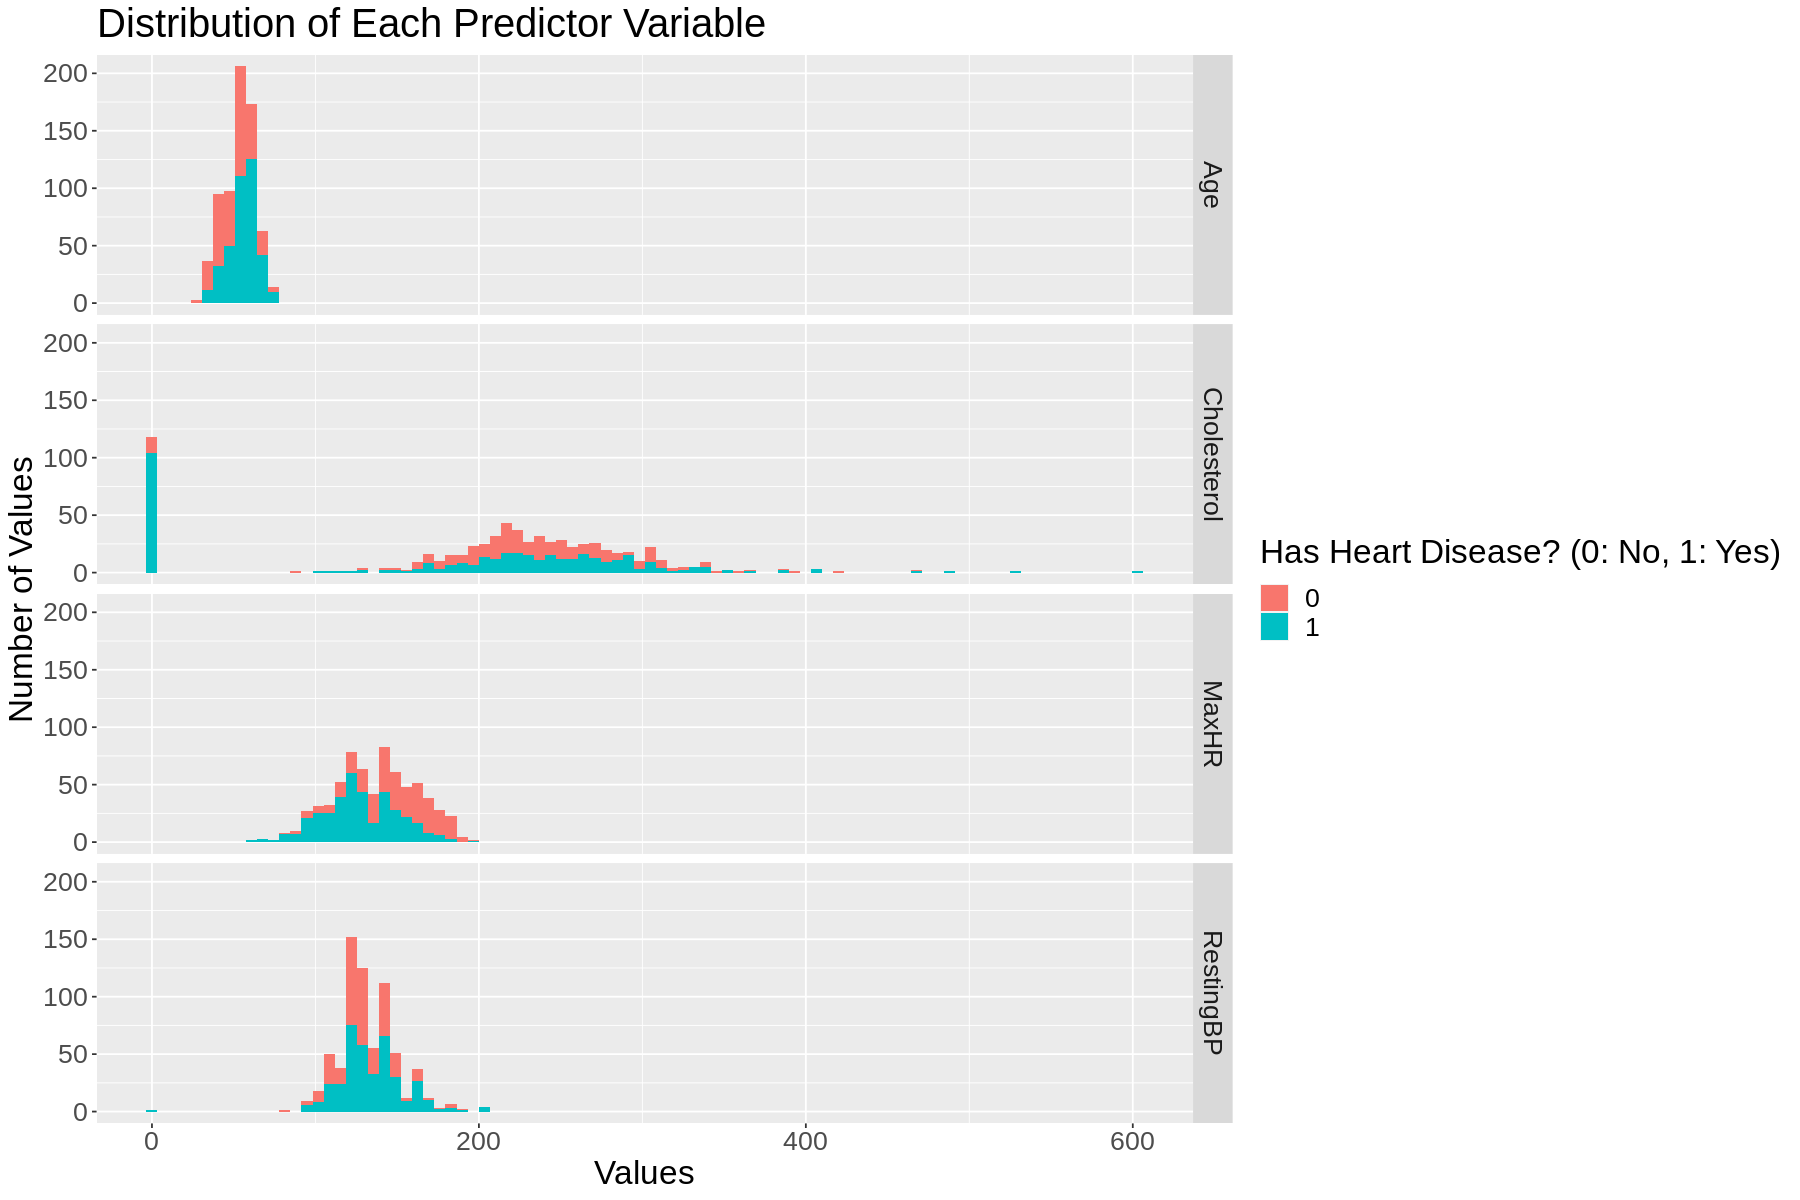

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)

heart_train %>%
    pivot_longer(Age:MaxHR, names_to = "column", values_to = "value") %>%
    ggplot(aes(x = value)) +
    geom_histogram(aes(fill = HeartDisease), bins = 90) +
    facet_grid(column ~ .) +
    labs(x = "Values", y = "Number of Values",
         title = "Distribution of Each Predictor Variable",
         fill = "Has Heart Disease? (0: No, 1: Yes)") +
    theme(text = element_text(size = 20))

The plots above show the distribution of patients with/without heart disease for the predictor variables used. The distribution for *Cholesterol* is noticeably different from the other distributions and seems to contain a large amount of zero values. Since having a concentration of 0 mm/dl of cholesterol is unrealistic, it is likely a missing value and we should consider removing observations with *Cholesterol* values of 0.

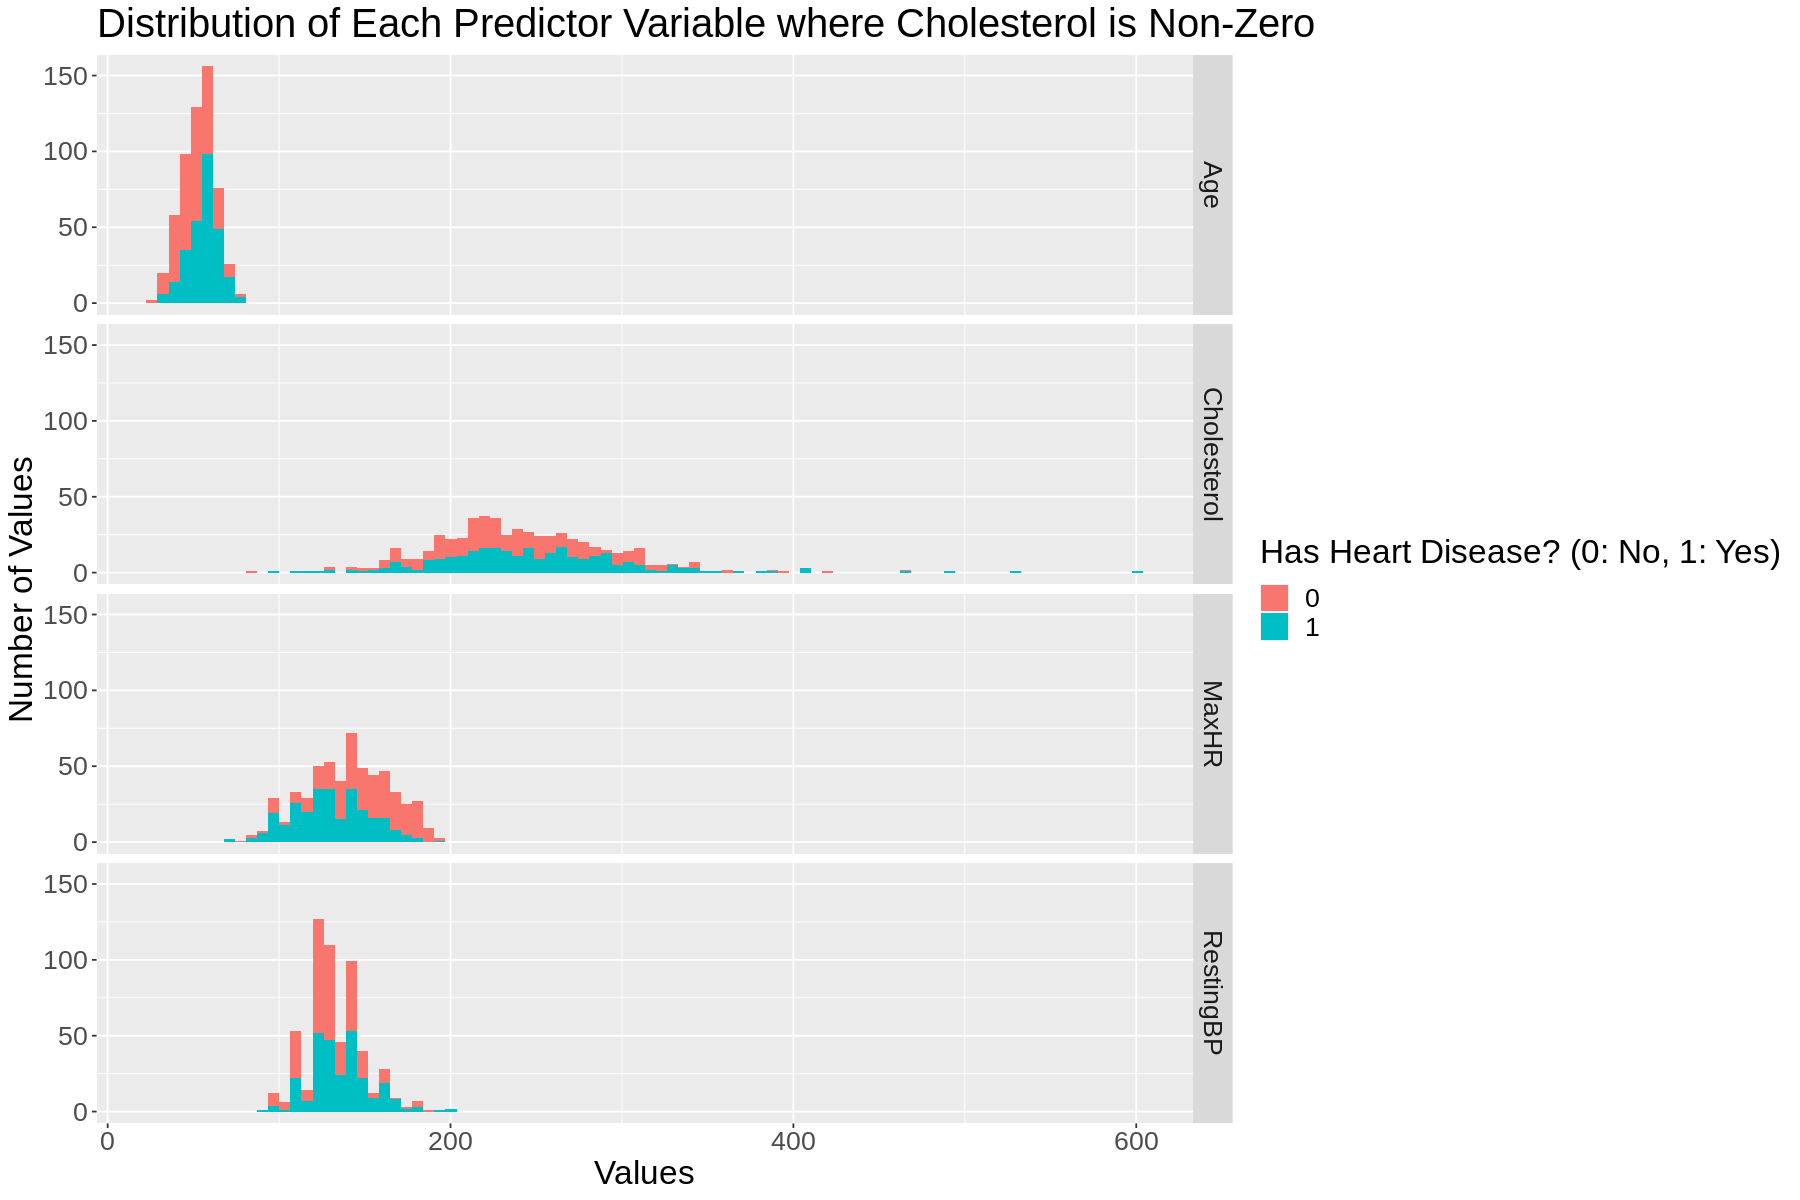

In [8]:
heart_train %>%
    filter(Cholesterol != 0) %>%
    pivot_longer(Age:MaxHR, names_to = "column", values_to = "value") %>%
    ggplot(aes(x = value)) +
    geom_histogram(aes(fill = HeartDisease), bins = 90) +
    facet_grid(column ~ .) +
    labs(x = "Values", y = "Number of Values",
         title = "Distribution of Each Predictor Variable where Cholesterol is Non-Zero",
         fill = "Has Heart Disease? (0: No, 1: Yes)") +
    theme(text = element_text(size = 20))

Even with the zero values removed, the distribution for the cholesterol is noticeably more spread out than all of the other features. This tells us that scaling and centering the data will likely help the KNN classifier do better.

**Methods**

We want to predict the presence of heart disease with a K-nearest neighbors classifier using the variables: *Age*, *RestingBP*, *Cholesterol* and *MaxHR*. The K value will be determined by performing 5-fold cross-validation. To visualize the results, we will use a scatter plot with predictor variables in pairs for the 2 axes and colour the background with what the KNN would predict at the spot.

**Expected Outcomes and Significance**

We expect to find that patients with higher values under our predictor columns are more likely to have heart disease. Since manually determining the presence of heart disease is difficult, this data can be used to detect the existence of cardiovascular disease early on and treat it before it is too late. With this information, people might be more inclined to work harder to reduce cholesterol levels, keep blood pressure under control and maintain a healthy lifestyle. Thus, this may help decrease the mortality rate from heart disease around the world. Future questions this could lead to include how could we improve our classification method as well as integrate these classification techniques into the diagnosis process in our healthcare system?